<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [2]:
!pip install imbalanced-learn==0.8.0

In [3]:
!pip install lime

In [4]:
## Import packages here
import pandas as pd
import numpy as np 
import imblearn
import lime.lime_tabular

from matplotlib.pyplot import figure
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, plot_confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from collections import Counter


## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [5]:
hf_df = pd.read_csv("heart.csv", index_col=False)
hf_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
hf_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
hf_df[hf_df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [8]:
hf_df['Cholesterol'].replace(0, np.nan, inplace=True)

In [9]:
hf_df[hf_df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [10]:
hf_df.Cholesterol.isnull().sum()

172

In [11]:
hf_df['Cholesterol'] = hf_df.groupby(['Age'])['Cholesterol'].transform(lambda x: np.where(np.isnan(x), x.mean(),x))

In [12]:
hf_df.Cholesterol.isnull().sum()

1

In [13]:
null_data = hf_df[hf_df.isnull().any(axis=1)]
null_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
375,73,F,NAP,160,NaN,0,ST,121,N,0.0,Up,1


In [14]:
hf_df.groupby('HeartDisease')['Cholesterol'].mean()

HeartDisease
0    238.968979
1    249.683470
Name: Cholesterol, dtype: float64

In [15]:
hf_df['Cholesterol'][375] = 249

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
hf_df.Cholesterol.isnull().sum()

0

In [17]:
hf_df.head()
        

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283.0,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214.0,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195.0,0,Normal,122,N,0.0,Up,0


In [18]:
hf_df.shape

(918, 12)

In [19]:
hf_df.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,0.061333,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.078055,0.070193,-0.112135,0.164803,0.107589
Cholesterol,0.061333,0.078055,1.000000,0.046174,-0.023454,0.053113,0.099180
FastingBS,0.198039,0.070193,0.046174,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,-0.023454,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.053113,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,0.099180,0.267291,-0.400421,0.403951,1.000000


In [20]:
hf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 86.2+ KB


In [21]:
data = hf_df.copy()

In [22]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [23]:
data.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [24]:
columns = ['Age','Sex','ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

In [25]:
data['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [26]:
X = data[['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']].values

In [27]:
y = data["HeartDisease"]

In [28]:
print(type(X))

<class 'numpy.ndarray'>


In [29]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])

le_CPT = preprocessing.LabelEncoder()
le_CPT.fit([ 'ASY', 'NAP', 'ATA', 'TA'])
X[:,2] = le_CPT.transform(X[:,2])


le_RECG = preprocessing.LabelEncoder()
le_RECG.fit([ 'Normal', 'LVH', 'ST'])
X[:,6] = le_RECG.transform(X[:,6]) 

le_Ang = preprocessing.LabelEncoder()
le_Ang.fit(['Y','N'])
X[:,8] = le_Ang.transform(X[:,8]) 

le_ST = preprocessing.LabelEncoder()
le_ST.fit(['Flat','Up', 'Down'])
X[:,10] = le_ST.transform(X[:,10]) 

X[0:10]



array([[40, 1, 1, 140, 289.0, 0, 1, 172, 0, 0.0, 2],
       [49, 0, 2, 160, 180.0, 0, 1, 156, 0, 1.0, 1],
       [37, 1, 1, 130, 283.0, 0, 2, 98, 0, 0.0, 2],
       [48, 0, 0, 138, 214.0, 0, 1, 108, 1, 1.5, 1],
       [54, 1, 2, 150, 195.0, 0, 1, 122, 0, 0.0, 2],
       [39, 1, 2, 120, 339.0, 0, 1, 170, 0, 0.0, 2],
       [45, 0, 1, 130, 237.0, 0, 1, 170, 0, 0.0, 2],
       [54, 1, 1, 110, 208.0, 0, 1, 142, 0, 0.0, 2],
       [37, 1, 0, 140, 207.0, 0, 1, 130, 1, 1.5, 1],
       [48, 0, 1, 120, 284.0, 0, 1, 120, 0, 0.0, 2]], dtype=object)

In [30]:
X.astype(int)

array([[40,  1,  1, ...,  0,  0,  2],
       [49,  0,  2, ...,  0,  1,  1],
       [37,  1,  1, ...,  0,  0,  2],
       ...,
       [57,  1,  0, ...,  1,  1,  1],
       [57,  0,  1, ...,  0,  0,  1],
       [38,  1,  2, ...,  0,  0,  2]])

In [31]:
y_raw = data['HeartDisease']

In [32]:
print(type(y_raw))

<class 'pandas.core.series.Series'>


In [33]:
X_raw = pd.DataFrame(X)

In [34]:
X_raw.columns=['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

In [35]:
print(type(X_raw))

<class 'pandas.core.frame.DataFrame'>


In [36]:
X_raw.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289.0,0,1,172,0,0.0,2
1,49,0,2,160,180.0,0,1,156,0,1.0,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2
3,48,0,0,138,214.0,0,1,108,1,1.5,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2


In [37]:
X_raw.ST_Slope.value_counts()

1    460
2    395
0     63
Name: ST_Slope, dtype: int64

In [38]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [39]:
data['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (734, 11) (734,)
Test set: (184, 11) (184,)


In [41]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [42]:
print(type(X_train))

<class 'numpy.ndarray'>


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [44]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = LR.predict(X_test)

In [45]:
LR.coef_

array([[ 0.17235441,  0.65054992, -0.63411103,  0.00592034,  0.20700175,
         0.52852459, -0.06883613, -0.37277718,  0.55797386,  0.37626126,
        -1.04366219]])

In [46]:
probs = LR.predict_proba(X_test)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

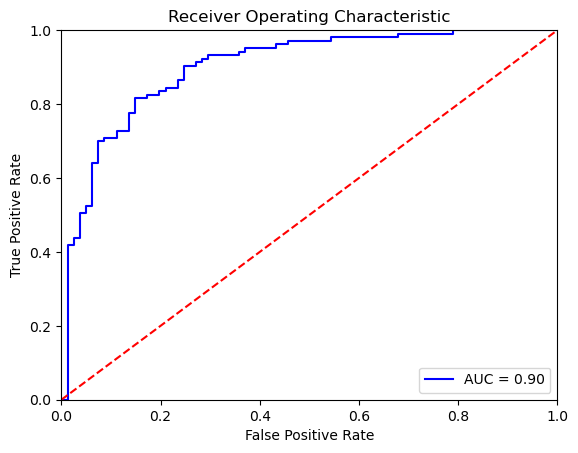

In [47]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [49]:
result = evaluate_metrics(y_test, y_pred)
result

{'accuracy': 0.8315217391304348,
 'recall': array([0.75308642, 0.89320388]),
 'precision': array([0.84722222, 0.82142857]),
 'f1score': array([0.79738562, 0.85581395])}

In [50]:
results = []
results.append(result)

In [51]:
from sklearn.model_selection import GridSearchCV

parameters = [{'solver': ['lbfgs', 'liblinear']},
              {'penalty':['none', 'l2']},
              {'C':[0.001, 0.01, 0.1, 1, 10, 100]}]



grid_search = GridSearchCV(estimator = LR,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'penalty': 'none'}

In [52]:
from sklearn.svm import LinearSVC

linSVC = LinearSVC()
linSVC = linSVC.fit(X_train, y_train)
y_predsvc = linSVC.predict(X_test)
result_linsvc = evaluate_metrics(y_test, y_predsvc)
results.append(result_linsvc)
result_linsvc

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'accuracy': 0.8315217391304348,
 'recall': array([0.75308642, 0.89320388]),
 'precision': array([0.84722222, 0.82142857]),
 'f1score': array([0.79738562, 0.85581395])}

In [53]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
result_svc = evaluate_metrics(y_test, preds)
result_svc
results.append(result_svc)

In [54]:
params_grid = { 'C':[1, 10, 100], 'kernel':['poly','rbf','sigmoid']}

model = SVC()

grid_search = GridSearchCV(estimator = model, param_grid = params_grid, scoring='f1', cv = 5, verbose=1)

grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'C': 1, 'kernel': 'rbf'}

In [55]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)
result_svc2 = evaluate_metrics(y_test, preds)
results.append(result_svc2)

In [56]:

params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}
model = DecisionTreeClassifier(random_state=123)
grid_search = GridSearchCV(estimator = model, 
                        param_grid = params_grid, 
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [57]:
best_params

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}

In [58]:
dtc = DecisionTreeClassifier(criterion = 'gini', max_depth = 5)
dtc = dtc.fit(X_train, y_train)
y_dtc = dtc.predict(X_test)

In [59]:
result_dtc = evaluate_metrics(y_test, y_dtc)
result_dtc
results.append(result_dtc)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc = rc.fit(X_train, y_train)
y_rc = rc.predict(X_test)

In [61]:
result_rc = evaluate_metrics(y_test, y_rc)
results.append(result_rc)
result_rc

{'accuracy': 0.8586956521739131,
 'recall': array([0.7654321 , 0.93203883]),
 'precision': array([0.89855072, 0.83478261]),
 'f1score': array([0.82666667, 0.88073394])}

In [62]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = LR.predict(X_test)

In [63]:
probs = LR.predict_proba(X_test)

import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [64]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.8043478260869565,
 'recall': array([0.67901235, 0.90291262]),
 'precision': array([0.84615385, 0.78151261]),
 'f1score': array([0.75342466, 0.83783784])}

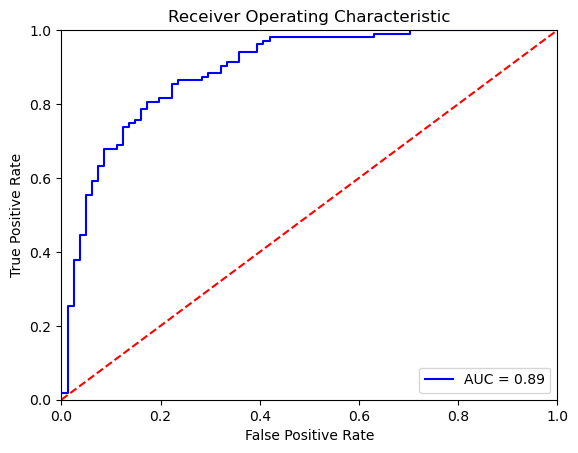

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
from sklearn.inspection import permutation_importance, plot_partial_dependence

In [67]:
f_importances = permutation_importance(estimator=LR, X=X_train, y=y_train, n_repeats=5, random_state=123, n_jobs=2)

In [68]:
f_importances.importances.shape

(11, 5)

In [69]:
def visualize_feature_importance(importance_array):
    # Sort the array based on mean value
    sorted_idx = importance_array.importances_mean.argsort()
    # Visualize the feature importances using boxplot
    fig, ax = plt.subplots()
    fig.set_figwidth(16)
    fig.set_figheight(10)
    fig.tight_layout()
    ax.boxplot(importance_array.importances[sorted_idx].T,
               vert=False, labels=df.columns[sorted_idx])
    ax.set_title("Permutation Importances (train set)")
    plt.show()

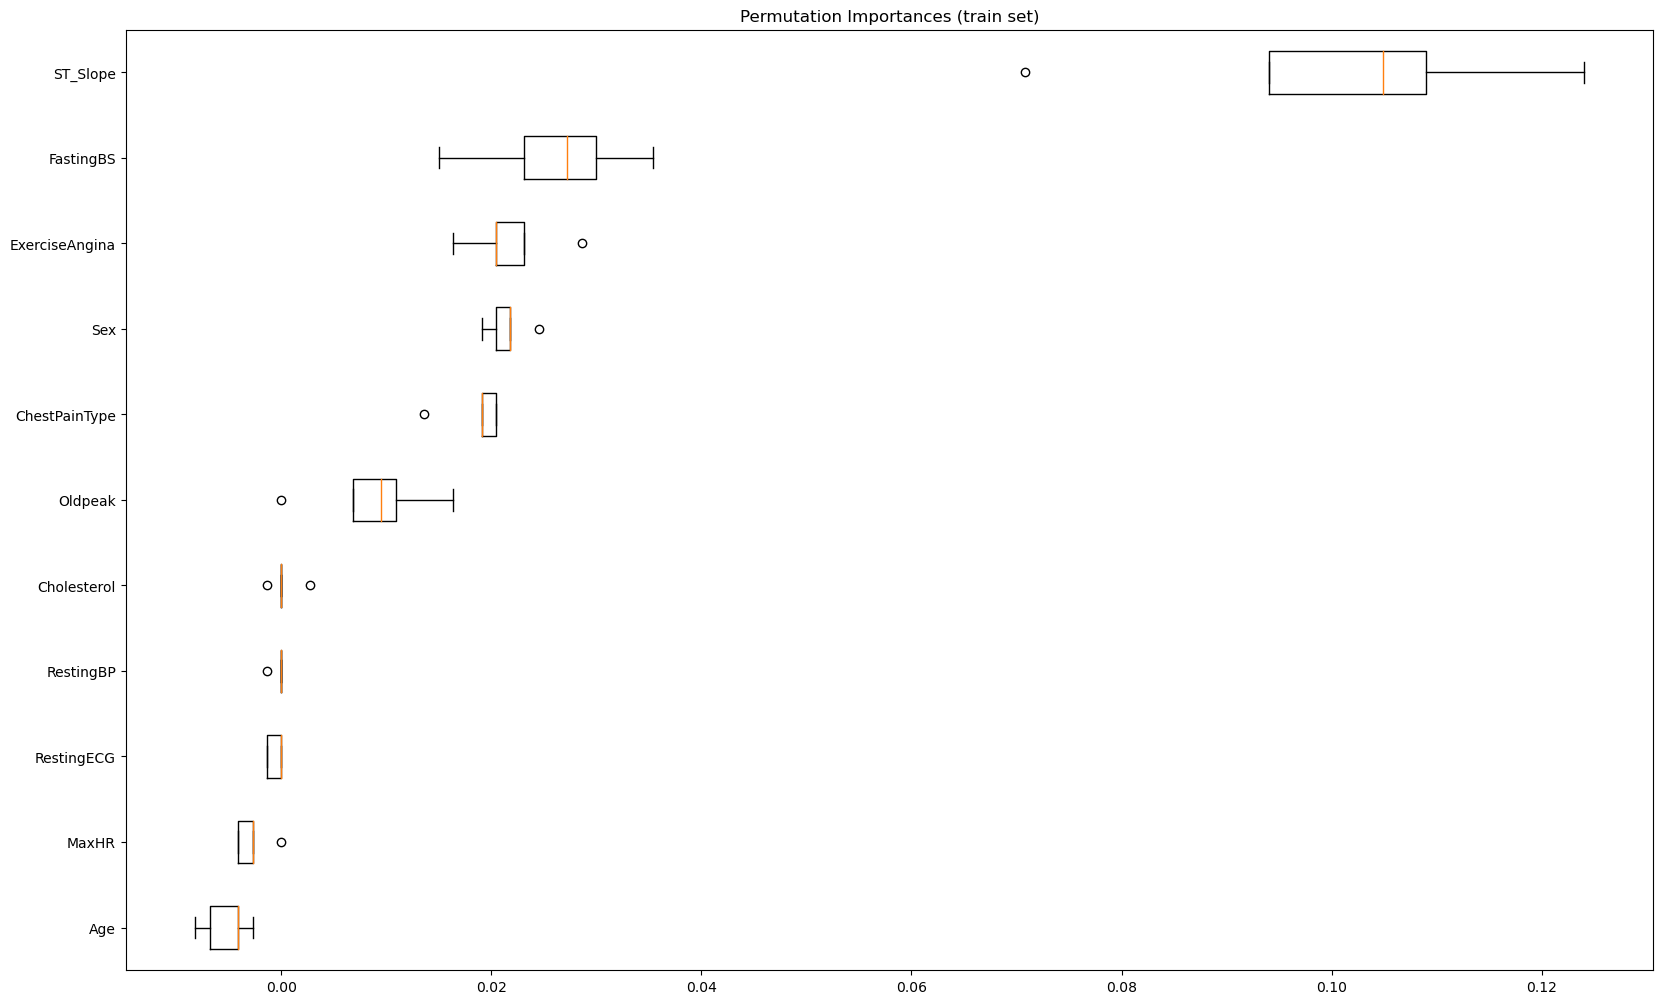

In [70]:
df= pd.DataFrame(X_train, columns= ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',  'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'])
visualize_feature_importance(f_importances)

In [71]:
imp_features2 = ['Sex', 'ChestPainType', 'Oldpeak' 'ExerciseAngina', 'FastingBS', 'ST_Slope']
imp_features = ['1', '10', '9', '8', '5', '2']

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


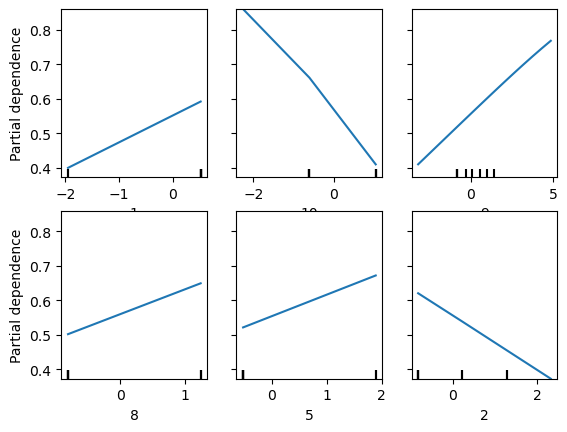

In [72]:
plot_partial_dependence(estimator=LR, X=X_train, features = imp_features, random_state=123) 

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, stratify=y, random_state = 12)

In [74]:
# Define a black-box random forest model
black_box_model = RandomForestClassifier(random_state = 123, max_depth=25, 
                             max_features=10, n_estimators=100, 
                             bootstrap=True)
# Train the model
black_box_model.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=25, max_features=10, random_state=123)

In [75]:
#predicting test set
y_blackbox = black_box_model.predict(X_test)

In [76]:
metrics.roc_auc_score(y_test, y_blackbox)

0.8510282161645146

In [77]:
result_blackbox = evaluate_metrics(y_test, y_blackbox)
results.append(result_blackbox)
result_blackbox

{'accuracy': 0.8586956521739131,
 'recall': array([0.7804878 , 0.92156863]),
 'precision': array([0.88888889, 0.83928571]),
 'f1score': array([0.83116883, 0.87850467])}

In [78]:
feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=5,
                                random_state=123, n_jobs=2)

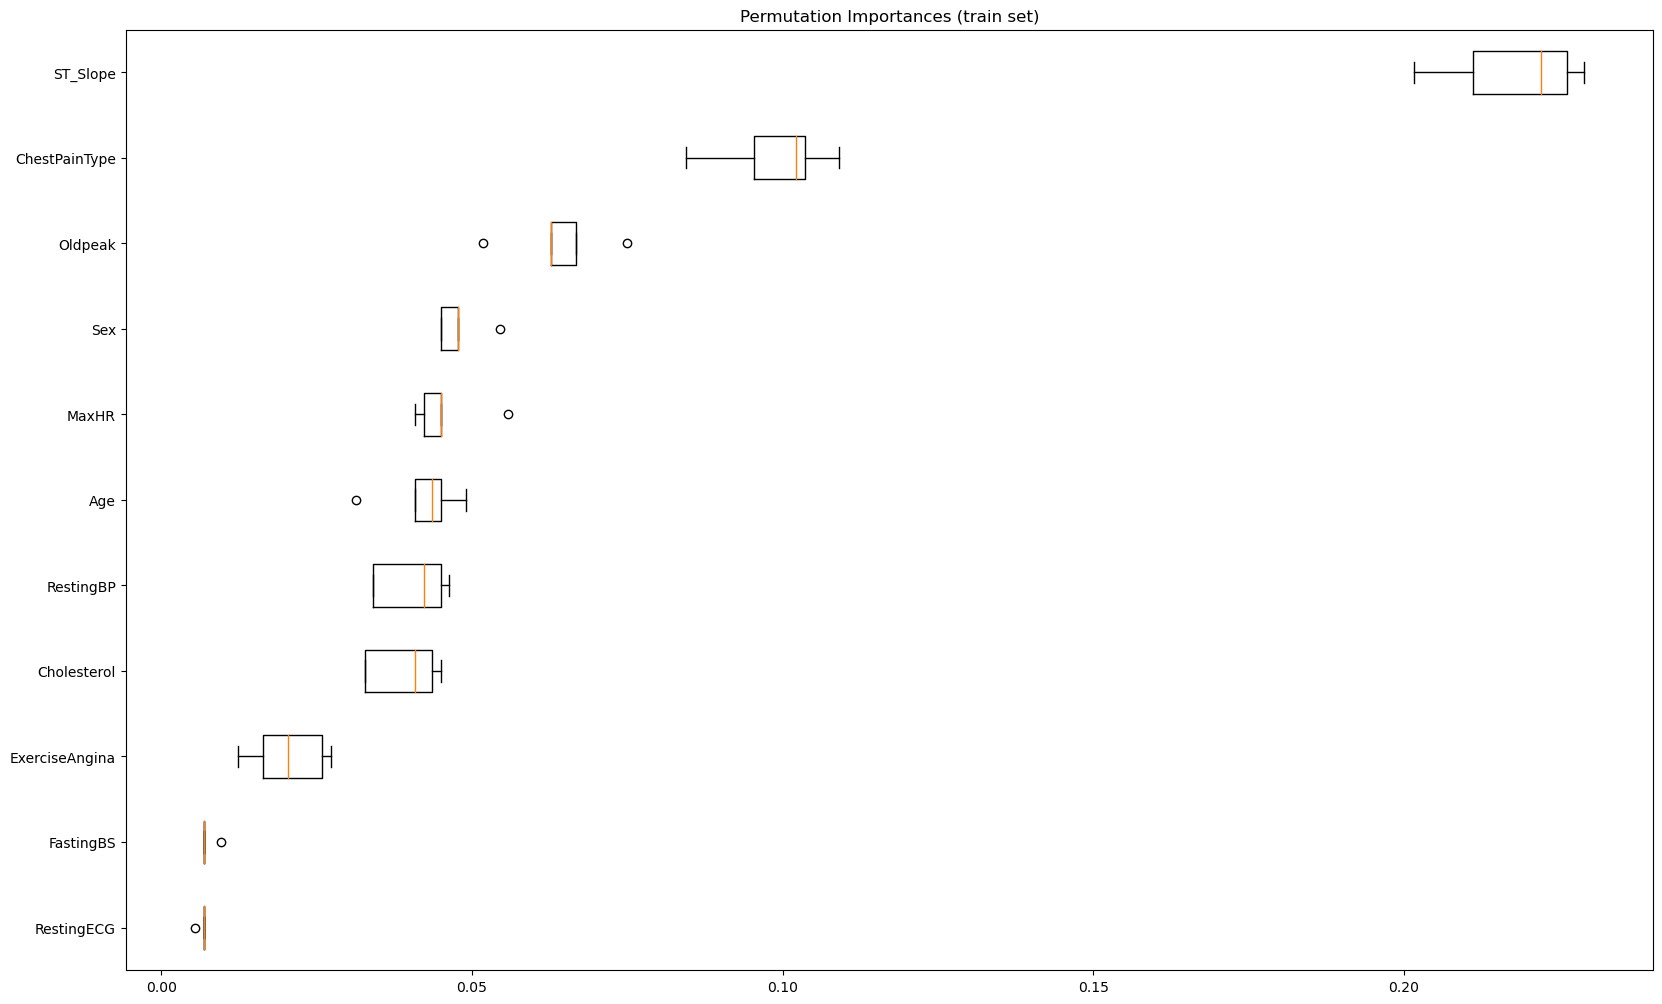

In [79]:
visualize_feature_importance(feature_importances)

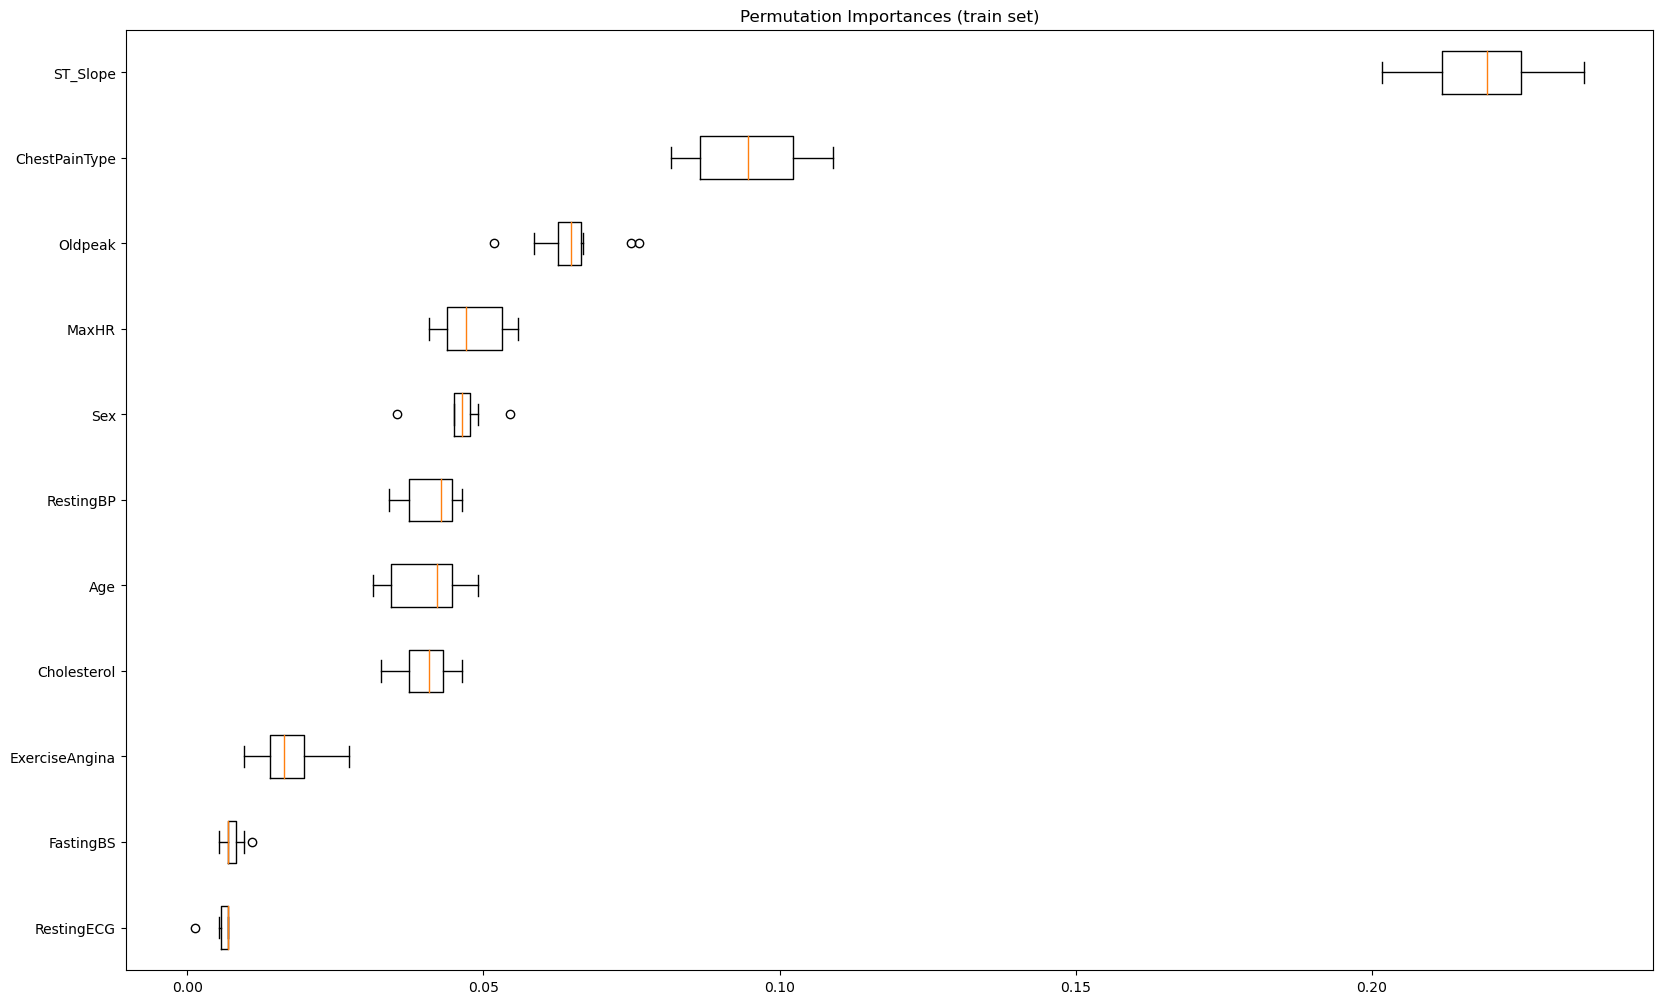

In [80]:
feature_importances = permutation_importance(estimator=black_box_model, X = X_train, y = y_train, n_repeats=10,
                                random_state=123, n_jobs=2)

visualize_feature_importance(feature_importances)

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


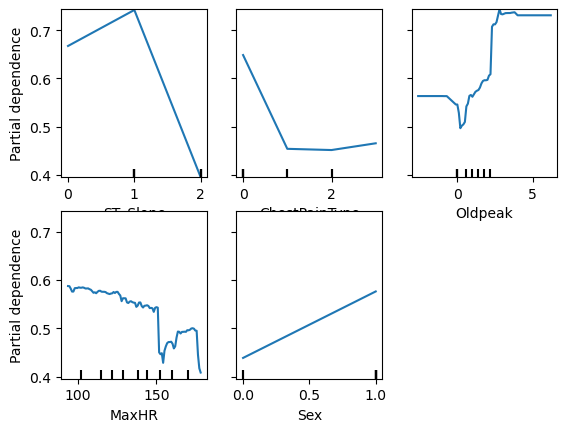

In [81]:
important_features = ['ST_Slope', 'ChestPainType', 'Oldpeak', 'MaxHR', 'Sex']
"arguments: "
" - estimator: the black box model"
" - X is the training data X"
" - features are the important features we are interested"
plot_partial_dependence(estimator=black_box_model, 
                        X=X_train, 
                        features=important_features,
                        random_state=123)

In [82]:
min_max_scaler = StandardScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [83]:
lm_surrogate = LogisticRegression(max_iter=1000, 
                                  random_state=123, penalty='l1', solver='liblinear')
lm_surrogate.fit(X_test_minmax, y_blackbox)

LogisticRegression(max_iter=1000, penalty='l1', random_state=123,
                   solver='liblinear')

In [84]:
y_surrogate = lm_surrogate.predict(X_test_minmax)

In [85]:
metrics.accuracy_score(y_blackbox, y_surrogate)

0.9184782608695652

In [86]:
metrics.roc_auc_score(y_blackbox, y_surrogate)

0.9231150793650794

In [87]:
evaluate_metrics(y_blackbox, y_surrogate)

{'accuracy': 0.9184782608695652,
 'recall': array([0.94444444, 0.90178571]),
 'precision': array([0.86075949, 0.96190476]),
 'f1score': array([0.90066225, 0.93087558])}

In [88]:
def get_feature_coefs(regression_model):
    coef_dict = {}
    # Filter coefficients less than 0.01
    for coef, feat in zip(regression_model.coef_[0, :], X_test.columns):
        if abs(coef) >= 0.01:
            coef_dict[feat] = coef
    # Sort coefficients
    coef_dict = {k: v for k, v in sorted(coef_dict.items(), key=lambda item: item[1])}
    return coef_dict

In [89]:
coef_dict = get_feature_coefs(lm_surrogate)
coef_dict

{'ST_Slope': -2.17525789623819,
 'ChestPainType': -0.7434431511859994,
 'RestingECG': 0.020118255598450253,
 'RestingBP': 0.1294785493778037,
 'FastingBS': 0.3065041516136047,
 'Cholesterol': 0.42180751617652945,
 'ExerciseAngina': 0.5576187733807246,
 'Oldpeak': 0.6008967955476152,
 'Age': 0.7761895394364545}

In [90]:
# Generate bar colors based on if value is negative or positive
def get_bar_colors(values):
    color_vals = []
    for val in values:
        if val <= 0:
            color_vals.append('r')
        else:
            color_vals.append('g')
    return color_vals

# Visualize coefficients
def visualize_coefs(coef_dict):
    features = list(coef_dict.keys())
    values = list(coef_dict.values())
    y_pos = np.arange(len(features))
    color_vals = get_bar_colors(values)
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, values, align='center', color=color_vals)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(features)
    # labels read top-to-bottom
    ax.invert_yaxis()  
    ax.set_xlabel('Feature Coefficients')
    ax.set_title('')
    plt.show()

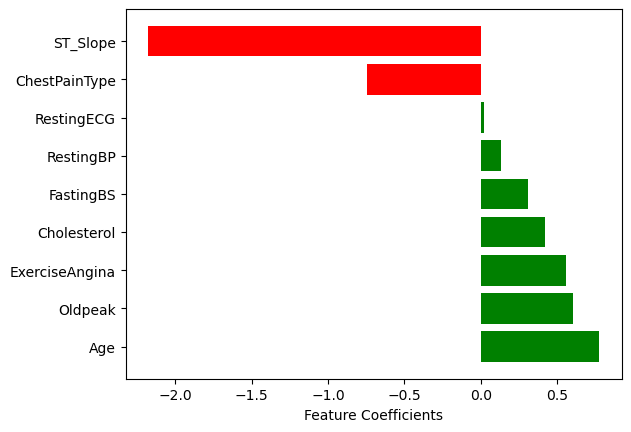

In [91]:
visualize_coefs(coef_dict)

In [92]:

explainer = lime.lime_tabular.LimeTabularExplainer(
    # Set the training dataset to be X_test.values (2-D Numpy array)
    training_data=X_test.values,
    # Set the mode to be classification
    mode='classification',
    # Set class names to be `Not Changing` and `Changing`
    class_names = ['No HD', 'Heart Disease'],
    # Set feature names
    feature_names=list(X_train.columns),
    random_state=123,
    verbose=True)

In [103]:
instance_index = 8
selected_instance = X_test.iloc[[instance_index]]
lime_test_instance = selected_instance.values.reshape(-1)
selected_instance

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
183,46,1,0,110,238.0,0,2,140,1,1.0,1


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Intercept 0.3101596731386885
Prediction_local [0.77808863]
Right: 0.94


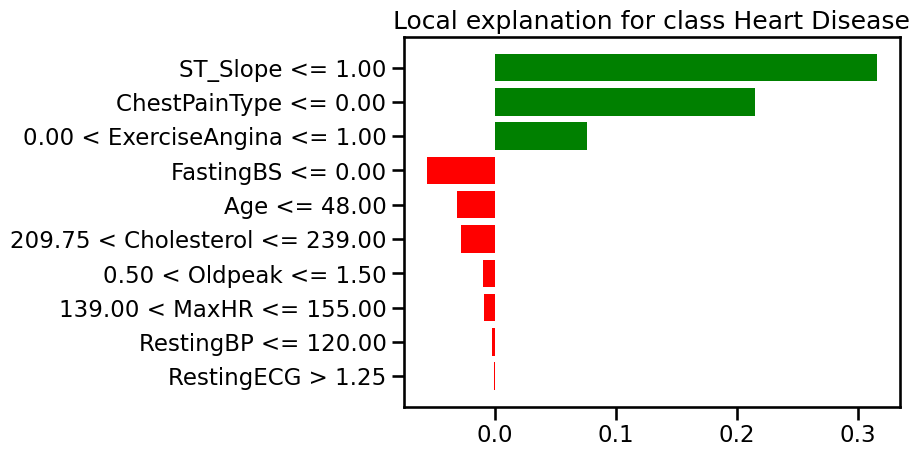

In [104]:
exp = explainer.explain_instance(
                                 # Instance to explain
                                 lime_test_instance, 
                                 # The prediction from black-box model
                                 black_box_model.predict_proba,
                                 # Use max 10 features
                                 num_features=10)
exp.as_pyplot_figure();

In [ ]:
def visualize_eval_metrics(results):
    df = pd.DataFrame(data=results)
    #table = pd.pivot_table(df, values='type', index=['accuracy', 'precision', 'recall', 'f1', 'auc'],
    #                columns=['type'])
    #df = df.set_index('type').transpose()
    print(df)
    x = np.arange(4)
    original = df.iloc[0, 1:].values
    width = 0.2
    figure(figsize=(12, 10), dpi=80)
    plt.bar(x-0.2, original, width, color='#95a5a6')
    plt.bar(x, class_weight, width, color='#d35400')
    plt.xticks(x, ['Accuracy', 'Recall','Precision', 'Fscore'])
    plt.xlabel("Evaluation Metrics")
    plt.ylabel("Score")
    plt.show()

In [96]:
result_lrsurrogate = evaluate_metrics(y_test, y_surrogate)
results.append(result_lrsurrogate)
result_lrsurrogate

{'accuracy': 0.842391304347826,
 'recall': array([0.80487805, 0.87254902]),
 'precision': array([0.83544304, 0.84761905]),
 'f1score': array([0.81987578, 0.85990338])}

In [97]:
cf = confusion_matrix(y_test, y_surrogate, normalize='true')

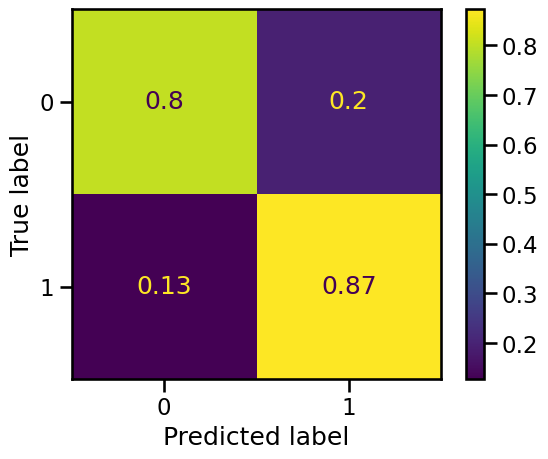

In [98]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import seaborn as sns


sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=LR.classes_)
disp.plot()
plt.show()

In [99]:
results_df = pd.DataFrame(results).T
results_df.columns = ['LR','LinSVC', 'SVC','SVC-rbf', 'DecisionTree','RF', 'RF-blackbox','LR-surrogate']
results_df

,LR,LinSVC,SVC,SVC-rbf,DecisionTree,RF,RF-blackbox,LR-surrogate
accuracy,0.831522,0.831522,0.858696,0.858696,0.804348,0.858696,0.858696,0.842391
recall,"[0.7530864197530864, 0.8932038834951457]","[0.7530864197530864, 0.8932038834951457]","[0.7654320987654321, 0.9320388349514563]","[0.7654320987654321, 0.9320388349514563]","[0.8024691358024691, 0.8058252427184466]","[0.7654320987654321, 0.9320388349514563]","[0.7804878048780488, 0.9215686274509803]","[0.8048780487804879, 0.8725490196078431]"
precision,"[0.8472222222222222, 0.8214285714285714]","[0.8472222222222222, 0.8214285714285714]","[0.8985507246376812, 0.8347826086956521]","[0.8985507246376812, 0.8347826086956521]","[0.7647058823529411, 0.8383838383838383]","[0.8985507246376812, 0.8347826086956521]","[0.8888888888888888, 0.8392857142857143]","[0.8354430379746836, 0.8476190476190476]"
f1score,"[0.7973856209150327, 0.8558139534883721]","[0.7973856209150327, 0.8558139534883721]","[0.8266666666666668, 0.8807339449541284]","[0.8266666666666668, 0.8807339449541284]","[0.7831325301204819, 0.8217821782178217]","[0.8266666666666668, 0.8807339449541284]","[0.8311688311688312, 0.8785046728971961]","[0.8198757763975155, 0.8599033816425121]"


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
